# A dataset about cans of beer.

Data from http://craftcans.com/

## Do your importing and your setup

In [4]:
import pandas as pd
%matplotlib inline

## Read in the file `craftcans.csv`, and look at the first first rows

In [5]:
df = pd.read_csv("craftcans.csv", na_values = ["???"])
df.head(1)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0


## How many rows do you have in the data? What are the column types?

In [6]:
df.columns


Index(['Beer', 'Brewery', 'Location', 'Style', 'Size', 'ABV', 'IBUs'], dtype='object')

In [7]:
len(df.index)

2416

In [8]:
df.shape


(2416, 7)

# Checking out breweries

Where does beer come from????

## What are the top 10 producers of cans of beer?

In [9]:
df['Brewery'].value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common size of beer?

The answer won't be pretty - we'll learn to clean it up in a week or two.

In [10]:
df['Size'].value_counts().head(1)

12 oz.    1507
Name: Size, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [11]:
df['ABV'].value_counts().head(1)

5.00%    215
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take three steps:

1. List just the ABV of every row
2. Remove the % symbol
3. Convert it to a `float`
4. Save it into a new column. Or the same column, if you're feeling wild.

Although it *also* turns out that there's some bad data in there. We'll need to clean that up, too.

In [12]:
#for replacing something in a column. Ex df.location.str.replace("Minneapolis", "Worst City")
#astype(float) (converting string to a float. Make sure to save )
df['new_ABV'] = df.ABV.str.replace("%","")
df['new_ABV'] = df['new_ABV'].astype(float) 
#new_ABV = df.new_ABV.astype(float) 
df['new_ABV'].dtype

dtype('float64')

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [13]:
df['Location'].value_counts().head(10) 

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [14]:
b_brooklyn = df[df['Location'] == "Brooklyn, NY"]
df['Beer'][df['Location'] == "Brooklyn, NY"]

115                              4Beans
210                              Jammer
246                             Abigale
404                       Nomader Weiss
421                                 Rad
439                        Molotov Lite
588                             Bengali
713                       Sensi Harvest
969                              Hi-Res
987               KelSo Nut Brown Lager
1057                      Global Warmer
1074                 Autumnation (2013)
1093               KelSo India Pale Ale
1267                          The Crisp
1268                       Sweet Action
1269                      Righteous Ale
1270                      Bengali Tiger
1305                      KelSo Pilsner
1365    Hipster Ale (Two Roads Brewing)
1366                        Bikini Beer
1373                East India Pale Ale
1624                             3Beans
1836                         Brownstone
1857                Brooklyn Summer Ale
1962    Hipster Ale (Westbrook Brewing)


## What brewery in Brooklyn puts out the most cans of beer?

In [15]:
b_brooklyn['Brewery'].value_counts().head(1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [16]:
sixpoint = b_brooklyn[b_brooklyn['Brewery'] == 'Sixpoint Craft Ales']
sixpoint['Style'].value_counts().head()

American IPA                      4
Baltic Porter                     2
Cream Ale                         2
American Double / Imperial IPA    2
Rye Beer                          2
Name: Style, dtype: int64

## List all of the breweries in New York state. Then count them.

In [17]:
df['Location'].str.contains("NY").value_counts()  


False    2336
True       74
Name: Location, dtype: int64

In [18]:
#pandas string contains 

#df[df['Location'].str.contains("NY", na=False)]    
NY_state = df[df['Location'].str.contains("NY", na=False)]
NY_brewery_list = NY_state['Brewery'].unique()
print(NY_brewery_list)

['Sixpoint Craft Ales' 'Evil Twin Brewing' 'Chatham Brewing'
 'Newburgh Brewing Company' 'Southampton Publick House'
 'Montauk Brewing Company' 'Matt Brewing Company' 'The Bronx Brewery'
 'KelSo Beer Company' 'Brooklyn Brewery' 'The Manhattan Brewing Company'
 'Blue Point Brewing Company' 'Bomb Beer Company' 'Dundee Brewing Company'
 'Upstate Brewing Company' 'Butternuts Beer and Ale']


# Measuring International Bitterness Units

IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## What is the average IBU measurement across all beers?

In [19]:
df['IBUs'].mean() 

42.713167259786474

## Draw the distribution of IBU measurements, but with *thirty* bins instead of the default of 10

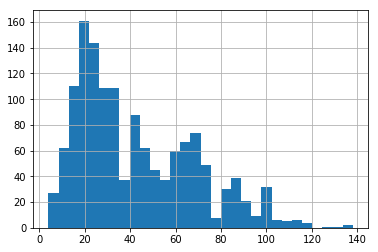

In [20]:
df['IBUs'].hist(bins = 30)  

## List all of the beers with IBUs above the 75th percentile

In [21]:
new_percent = df["IBUs"].quantile(q=0.75)
new_percent

64.0

In [22]:
df[df['IBUs'] > new_percent].sort_values(by = 'IBUs', ascending = False) 

,Beer,Brewery,Location,Style,Size,ABV,IBUs,new_ABV
1662,Bitter Bitch Imperial IPA,Astoria Brewing Company,"Astoria, OR",American Double / Imperial IPA,12 oz.,8.20%,138.0,8.2
989,Troopers Alley IPA,Wolf Hills Brewing Company,"Abingdon, VA",American IPA,12 oz.,5.90%,135.0,5.9
611,Dead-Eye DIPA,Cape Ann Brewing Company,"Gloucester, MA",American Double / Imperial IPA,16 oz.,9.00%,130.0,9.0
249,Bay of Bengal Double IPA (2014),Christian Moerlein Brewing Company,"Cincinnati, OH",American Double / Imperial IPA,12 oz.,8.90%,126.0,8.9
1537,Heady Topper,The Alchemist,"Waterbury, VT",American Double / Imperial IPA,16 oz.,8.00%,120.0,8.0
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.70%,120.0,9.7
2182,Heady Topper,The Alchemist,"Waterbury, VT",American Double / Imperial IPA,16 oz.,8.00%,120.0,8.0
556,More Cowbell,Buffalo Bayou Brewing Company,"Houston, TX",American Double / Imperial IPA,16 oz.,9.00%,118.0,9.0
1783,On the Wings of Armageddon,DC Brau Brewing Company,"Washington, DC",American Double / Imperial IPA,12 oz.,9.20%,115.0,9.2
1209,Overlord Imperial IPA,Tin Man Brewing Company,"Evansville, IN",American Double / Imperial IPA,16 oz.,8.50%,115.0,8.5


## List all of the beers with IBUs below the 25th percentile

In [23]:
bottom_percent = df["IBUs"].quantile(q=0.25)
bottom_percent

21.0

In [24]:
df[df['IBUs'] < bottom_percent].sort_values(by = 'IBUs', ascending = False)  

,Beer,Brewery,Location,Style,Size,ABV,IBUs,new_ABV
1263,Sanitas Saison Ale,Sanitas Brewing Company,"Boulder, CO",Saison / Farmhouse Ale,12 oz.,5.80%,20.0,5.8
1453,Wild Plum Farmhouse Ale,Tallgrass Brewing Company,"Manhattan, KS",Saison / Farmhouse Ale,16 oz.,5.60%,20.0,5.6
1265,Double D Blonde (2013),Hop Valley Brewing Company,"Springfield, OR",American Blonde Ale,12 oz.,4.90%,20.0,4.9
1313,UFO Pumpkin,Harpoon Brewery,"Boston, MA",Pumpkin Ale,12 oz.,5.90%,20.0,5.9
1320,Greenbelt Farmhouse Ale,Armadillo Ale Works,"Denton, TX",Saison / Farmhouse Ale,12 oz.,5.10%,20.0,5.1
1334,Wild Wolf Wee Heavy Scottish Style Ale,Wild Wolf Brewing Company,"Nellysford, VA",Scotch Ale / Wee Heavy,12 oz.,5.70%,20.0,5.7
1335,Steel Rail Extra Pale Ale,Berkshire Brewing Company,"South Deerfield, MA",American Pale Ale (APA),12 oz.,5.30%,20.0,5.3
1408,Dos Pistolas,Great River Brewery,"Davenport, IA",Vienna Lager,12 oz.,4.80%,20.0,4.8
1417,Love Street Summer Seasonal (2014),Karbach Brewing Company,"Houston, TX",Kölsch,12 oz.,4.70%,20.0,4.7
1449,Bomber Mountain Amber Ale (2013),The Black Tooth Brewing Company,"Sheridan, WY",American Amber / Red Ale,12 oz.,4.60%,20.0,4.6


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the nan ones at the bottom. I want a nice graph, too - don't let them all be squished together, either!

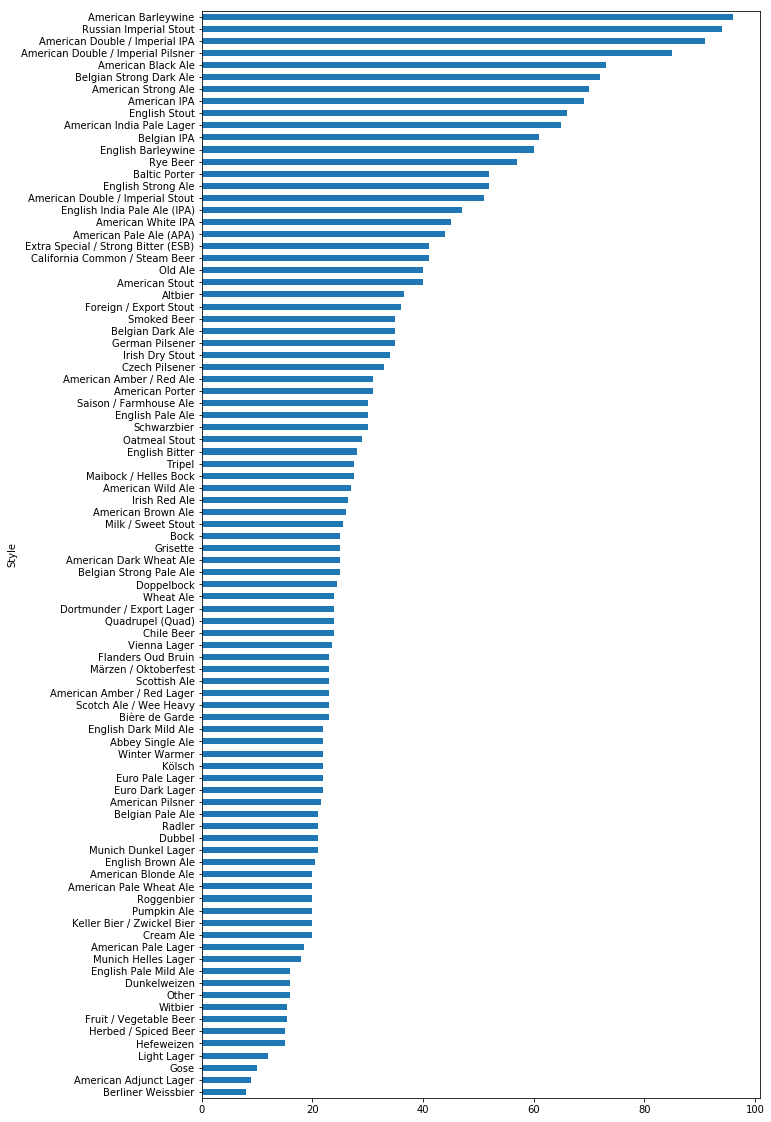

In [25]:
median_ibus = df.groupby('Style')['IBUs'].median()
median_ibus = median_ibus.sort_values(na_position='first')  
median_ibus.dropna().plot(kind ='barh', figsize = {10,20})  

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

You'll want to think about it in three pieces - finding the high IBU beers, then finding out what the most common styles are, then getting the top 5.

In [26]:
top_fifty = df.sort_values(by = 'IBUs', ascending = False).head(100)
bottom_fifty = df.sort_values(by = 'IBUs', ascending = False).tail(100)

In [27]:
#high-IBU beer 
top_fifty.groupby('Style')['Style'].value_counts().sort_values(ascending = False).groupby(level=0).head(5) 

Style                                Style                              
American Double / Imperial IPA       American Double / Imperial IPA         49
American IPA                         American IPA                           36
Russian Imperial Stout               Russian Imperial Stout                  5
American Black Ale                   American Black Ale                      2
American Barleywine                  American Barleywine                     2
American Amber / Red Ale             American Amber / Red Ale                2
Rye Beer                             Rye Beer                                1
Extra Special / Strong Bitter (ESB)  Extra Special / Strong Bitter (ESB)     1
English India Pale Ale (IPA)         English India Pale Ale (IPA)            1
American Strong Ale                  American Strong Ale                     1
Name: Style, dtype: int64

In [28]:
#low-IBU beer 
bottom_fifty.groupby('Style')['Style'].value_counts().sort_values(ascending = False).groupby(level=0).head(5) 

Style                       Style                     
American Amber / Red Ale    American Amber / Red Ale      12
American IPA                American IPA                  12
American Pale Ale (APA)     American Pale Ale (APA)       10
American Blonde Ale         American Blonde Ale            7
Witbier                     Witbier                        4
German Pilsener             German Pilsener                4
English Pale Ale            English Pale Ale               4
Belgian Pale Ale            Belgian Pale Ale               3
American Pale Wheat Ale     American Pale Wheat Ale        3
American Brown Ale          American Brown Ale             3
American Amber / Red Lager  American Amber / Red Lager     3
Schwarzbier                 Schwarzbier                    3
Kölsch                      Kölsch                         2
English Brown Ale           English Brown Ale              2
Dubbel                      Dubbel                         2
Vienna Lager                Vi

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles (also draw a histogram)

I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

In [29]:
#Average of these beers 
new_beer = ["Witbier", "Hefeweizen", "American Pale Wheat Ale"]
new_WHA = df[df['Style'].isin(new_beer)]
new_WHA
 
new_WHA.groupby('Style')['IBUs'].mean() 

Style
American Pale Wheat Ale    20.688525
Hefeweizen                 17.592593
Witbier                    16.208333
Name: IBUs, dtype: float64

In [30]:
#Mean of all of these beer's IBUs 
new_WHA['IBUs'].mean() 

18.982142857142858

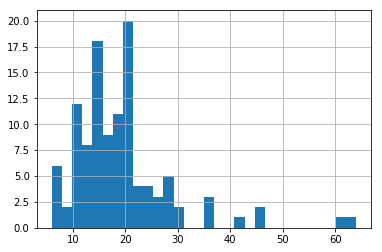

In [31]:
new_WHA['IBUs'].hist(bins=30)

In [32]:
#plotting all of the "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles based on IBUs 
#new_WHA.groupby('Style')['IBUs'].hist(bins=30) 

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

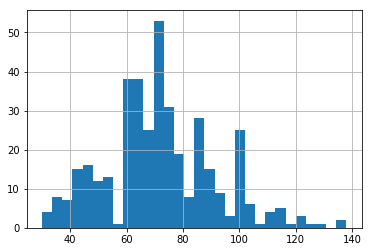

In [33]:
avg_ipa = df[df['Style'].str.contains("IPA", na=False)] 
avg_ipa.groupby('Style')['IBUs'].mean()
avg_ipa['IBUs'].hist(bins=30) 

## Plot those two histograms on top of one another

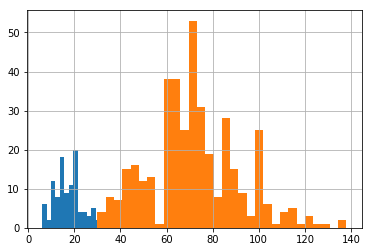

In [34]:
ax = new_WHA['IBUs'].hist(bins=30)
avg_ipa['IBUs'].hist(bins=30, ax=ax)

## Compare the ABV of wheat beers vs. IPAs 

In [35]:
df.columns


Index(['Beer', 'Brewery', 'Location', 'Style', 'Size', 'ABV', 'IBUs',
       'new_ABV'],
      dtype='object')

In [36]:
#The Average ABVs of wheat beers 
wheat_abv = df[df['Style'].str.contains("Wheat", na=False)] 
wheat_abv
wheat_abv.groupby('Style')['new_ABV'].mean().groupby(level=0).head()

Style
American Dark Wheat Ale    5.233333
American Pale Wheat Ale    4.841053
Wheat Ale                  6.000000
Name: new_ABV, dtype: float64

In [37]:
#The average ABVs of ipa beers 
ipa_abv = df[df['Style'].str.contains("IPA", na=False)] 
ipa_abv
ipa_abv.groupby('Style')['new_ABV'].mean().groupby(level=0).head()

Style
American Double / Imperial IPA    8.736893
American IPA                      6.452758
American White IPA                5.963636
Belgian IPA                       7.135294
English India Pale Ale (IPA)      6.233333
Name: new_ABV, dtype: float64